## 二维卷积(图像滤波)
图像也可以通过各种低通滤波器（LPF）、高通滤波器（HPF）等进行过滤。
1. LPF(低通滤波器) 有助于消除噪音、模糊图像等。
2. HPF(高通滤波器) 滤波器有助于在图像中找到边缘。

这是一个均值滤波
$$ K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix} $$

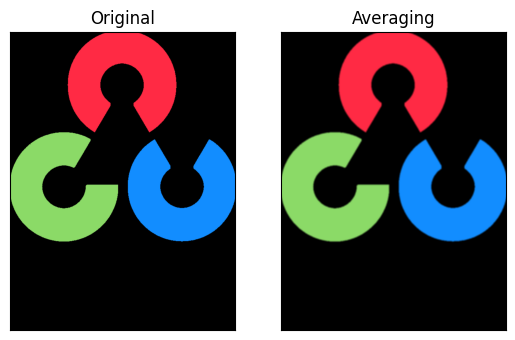

In [45]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def plot_image(index, img, strName):
    """
    绘制图像并设置子图属性。

    参数：
    - index: 子图的索引
    - img: 要绘制的图像（RGB 格式）
    - strName: 子图的标题
    """
    plt.subplot(index), plt.imshow(img), plt.title(strName)
    plt.xticks([]), plt.yticks([])

# 读取图像并将颜色通道从 BGR 转换为 RGB
#img = cv.imread('messi.jpg')
img = cv.imread('../data/opencv-logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 创建一个 5x5 的均值滤波核
kernel = np.ones((5, 5), np.float32) / 25

# 应用均值滤波器来平滑图像
dst = cv.filter2D(img, -1, kernel)

# 调用函数绘制图像
plot_image(121, img, "Original")
plot_image(122, dst, "Averaging")

plt.show()


手动添加噪声

In [46]:
import numpy as np
import cv2

def add_gaussian_noise(image, mean, variance):
    """
    在图像中添加高斯噪声。

    参数：
    - image: 原始图像，使用OpenCV加载的图像对象。
    - mean: 均值。
    - variance: 方差。

    返回值：
    - noisy_image: 添加噪声后的图像。

    """
    # 计算标准差
    sigma = np.sqrt(variance)

    # 创建与原始图像相同大小的噪声矩阵
    noise = np.zeros(image.shape, dtype=np.uint8)

    # 生成服从高斯分布的随机噪声
    cv2.randn(noise, mean, sigma)

    # 将噪声添加到原始图像中
    noisy_image = cv2.add(image, noise)

    return noisy_image

# 读取原始图像
img = cv2.imread('messi.jpg')

# 添加高斯噪声
mean = 100  # 均值
variance = 100  # 方差
noisy_img = add_gaussian_noise(img, mean, variance)

# 显示原始图像和添加噪声后的图像
cv2.imshow('Original Image', img)
cv2.imshow('Noisy Image', noisy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [47]:
import numpy as np
import cv2

def add_salt_and_pepper_noise(image, noise_ratio):
    """
    在图像中添加椒盐噪声。

    参数：
    - image: 原始图像，使用OpenCV加载的图像对象。
    - noise_ratio: 噪声比例，介于0和1之间的值，表示要添加的噪声像素所占比例。

    返回值：
    - noisy_image: 添加噪声后的图像。

    """
    # 创建与原始图像相同大小的噪声矩阵
    noise = np.random.choice([0, 255], size=image.shape, p=[1 - noise_ratio, noise_ratio]).astype(np.uint8)

    # 将噪声添加到原始图像中
    noisy_image = cv2.add(image, noise)

    return noisy_image

# 读取原始图像
img = cv2.imread('messi.jpg')

# 添加椒盐噪声
noise_ratio = 0.05  # 噪声比例
noisy_img = add_salt_and_pepper_noise(img, noise_ratio)

# 显示原始图像和添加噪声后的图像
cv2.imshow('Original Image', img)
cv2.imshow('Noisy Image', noisy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 图像模糊（图像平滑）
1. 均值模糊
2. 高斯模糊
3. 中值滤波
4. 双边滤波 
### 均值模糊

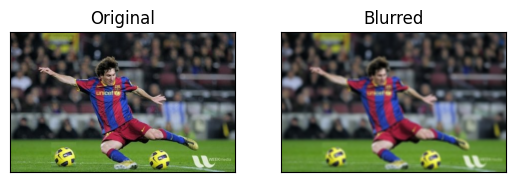

In [51]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#img = cv.imread('../data/opencv-logo.png')
img = cv.imread('messi.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


### 高斯模糊
高斯核
1. 需要指定内核的宽度和高度
2. 宽度和高度是正数并且是奇数(奇数才有一个中位数)
3. 指定 x 和 y 方向的标准偏差
4. 高斯模糊是消除图像高斯噪声的有效方法。  

高斯滤波器取像素周围的邻域并找到其高斯加权平均值。该高斯滤波器是一个空间函数，即在滤波时考虑相邻像素。但是它不考虑像素是否具有几乎相同的强度，也不考虑像素是否是边缘像素。所以它也会模糊边缘，这是我们不想做的。

(794, 600, 3)


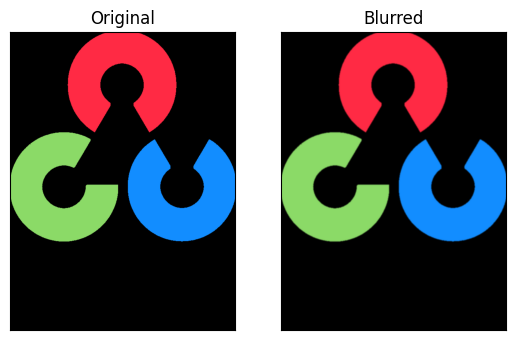

In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/opencv-logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(img,(5,5),0)
print(blur.shape)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


## 中值滤波
1. 取内核区域下所有像素的中值，将中央元素替换为该中值。
2. 对图像中的椒盐噪声非常有效
3. 它的内核大小应该是一个正的奇数整数。

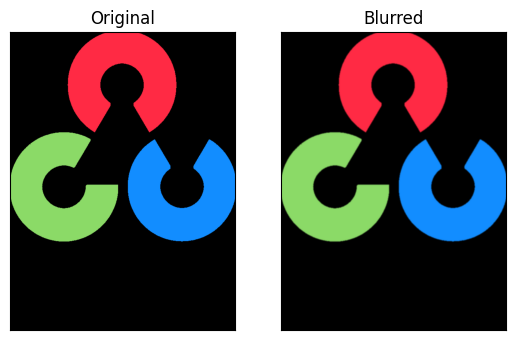

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/opencv-logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


### 双边滤波
1. 保持边缘锐利的同时，对噪声去除非常有效


(794, 600, 3)


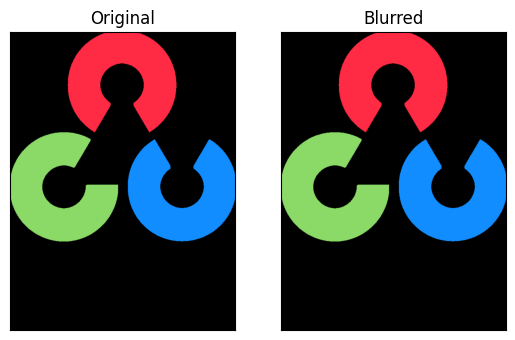

In [53]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/opencv-logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.bilateralFilter(img,9,75,75)
print(blur.shape)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


要针对不通用的噪声使用不同的滤波,这一点在本节没看到效果